
# PCA and K-Means Clustering Project
## Dimensionality Reduction and Clustering Analysis

This notebook implements a complete PCA and clustering pipeline on the Wine dataset.


In [1]:

import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score


## Create Output Folders

In [2]:

folders = [
    "outputs",
    "outputs/eda_plots",
    "outputs/pca_plots",
    "outputs/clustering_plots",
    "outputs/visuals",
    "outputs/reports",
    "data/processed"
]

for f in folders:
    os.makedirs(f, exist_ok=True)

print("Required folders created.")


Required folders created.


## Load Dataset

In [3]:

df_raw = pd.read_csv("data/raw/wine.csv")
print("Dataset shape:", df_raw.shape)
df_raw.head()


Dataset shape: (178, 14)


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Exploratory Data Analysis

In [4]:

df_raw.describe()


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


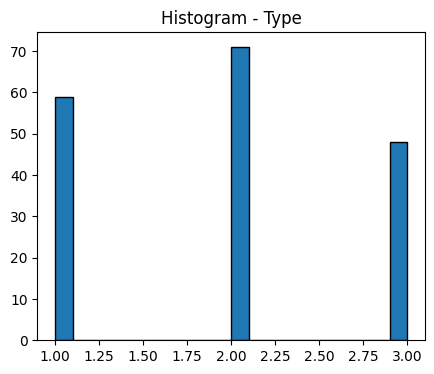

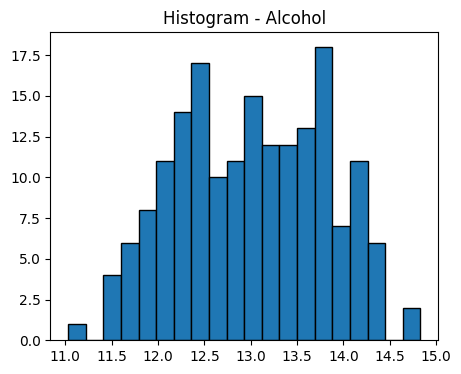

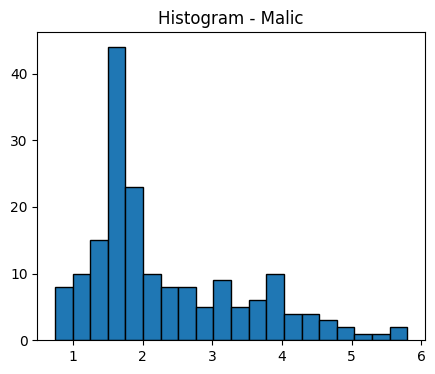

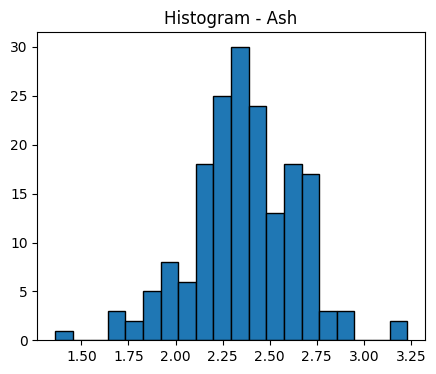

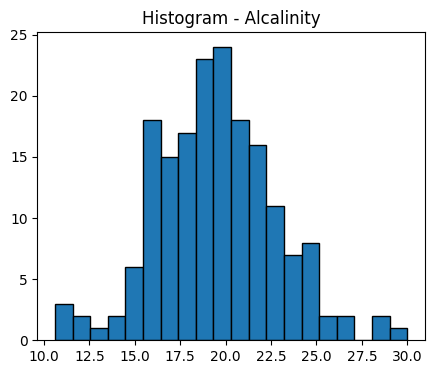

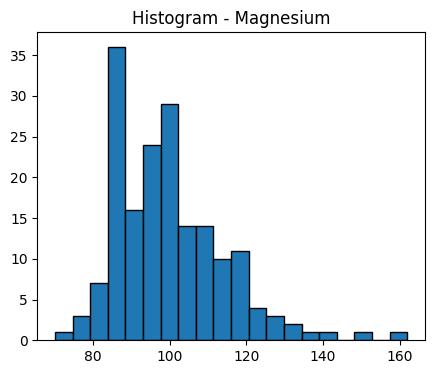

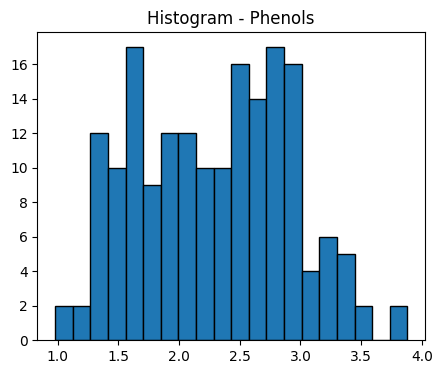

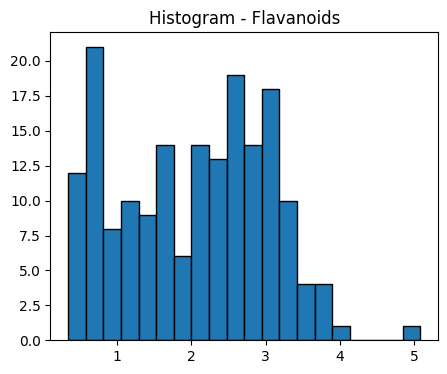

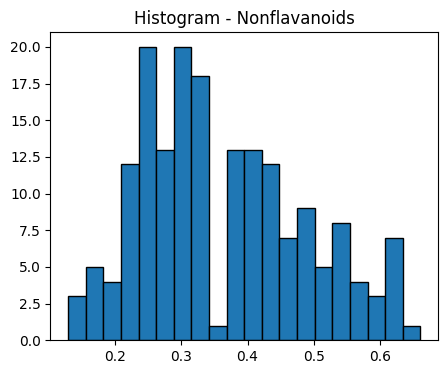

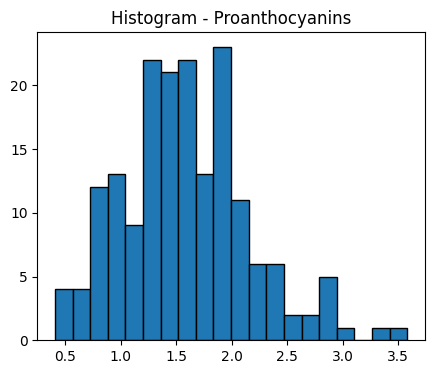

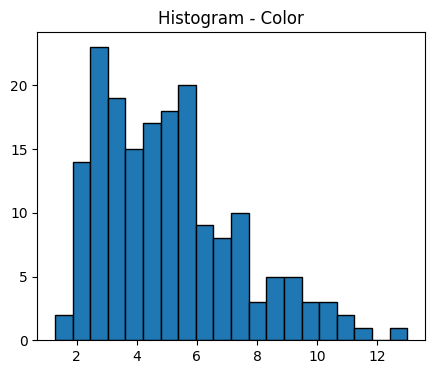

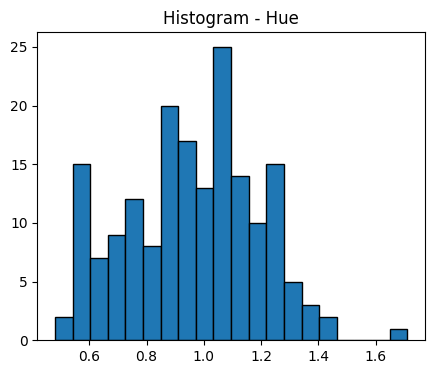

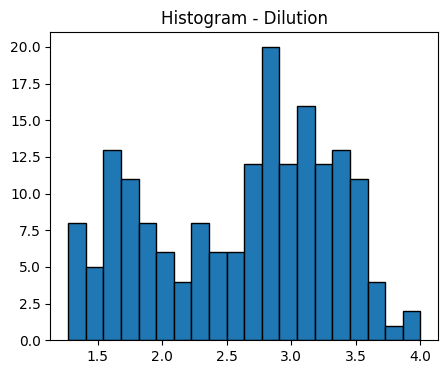

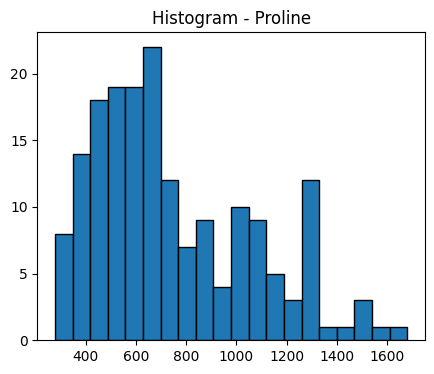

In [5]:

for col in df_raw.select_dtypes(include=["int64","float64"]).columns:
    plt.figure(figsize=(5,4))
    plt.hist(df_raw[col], bins=20, edgecolor="black")
    plt.title(f"Histogram - {col}")
    plt.savefig(f"outputs/eda_plots/histogram_{col}.png")
    plt.show()
    plt.close()


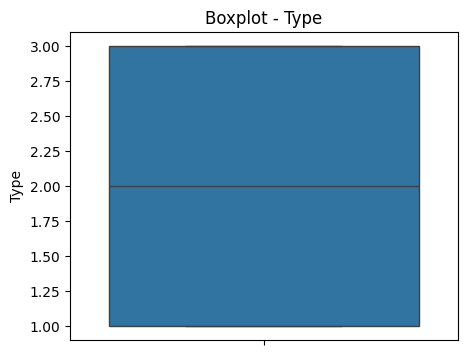

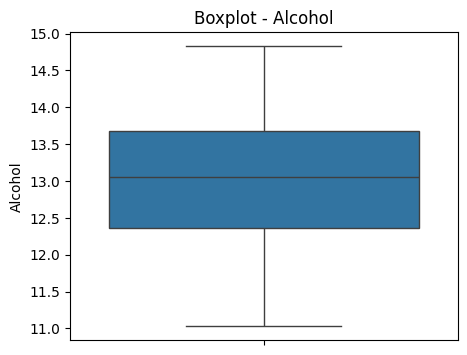

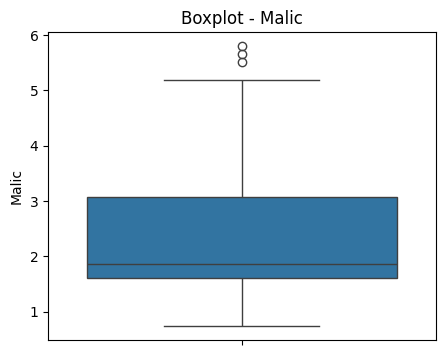

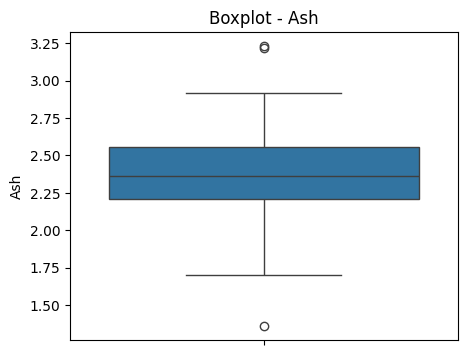

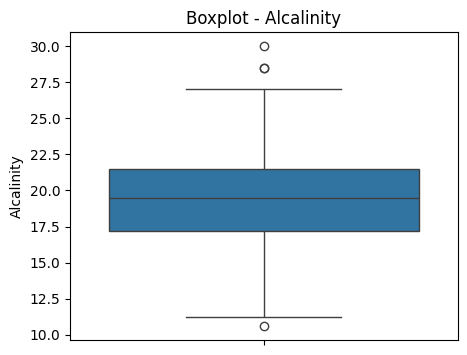

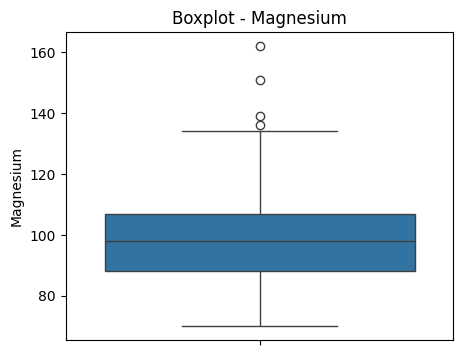

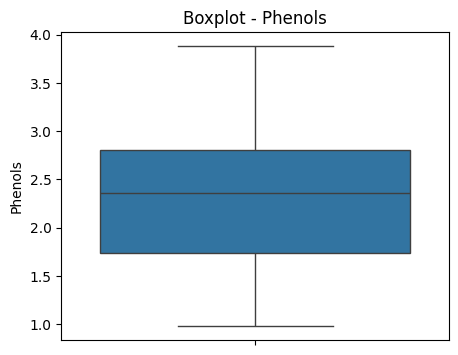

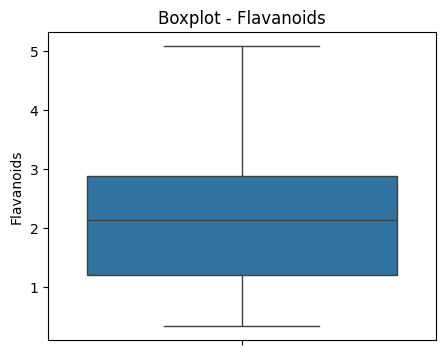

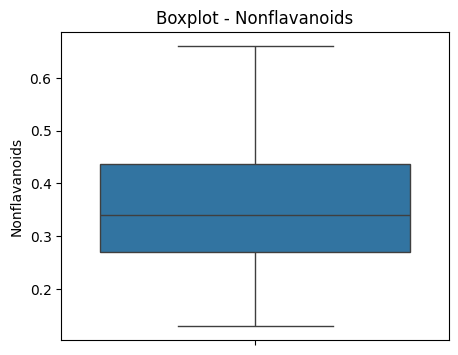

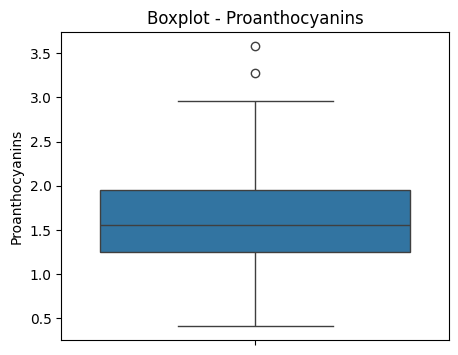

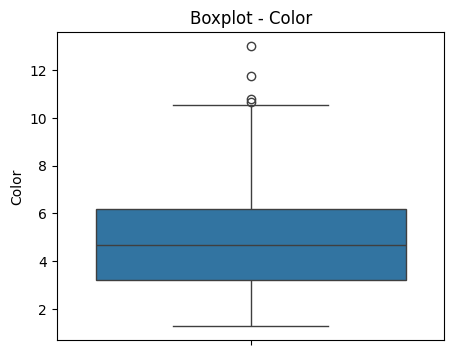

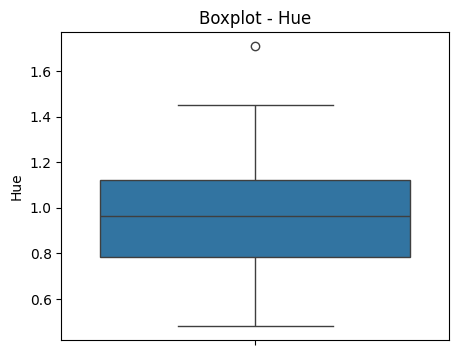

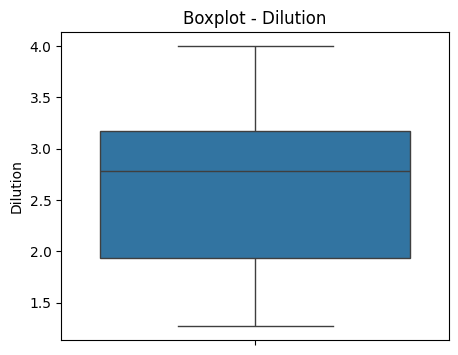

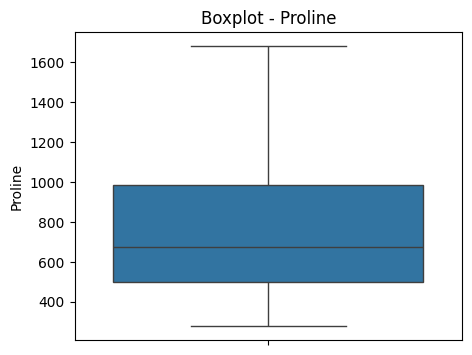

In [6]:

for col in df_raw.select_dtypes(include=["int64","float64"]).columns:
    plt.figure(figsize=(5,4))
    sns.boxplot(y=df_raw[col])
    plt.title(f"Boxplot - {col}")
    plt.savefig(f"outputs/eda_plots/boxplot_{col}.png")
    plt.show()
    plt.close()


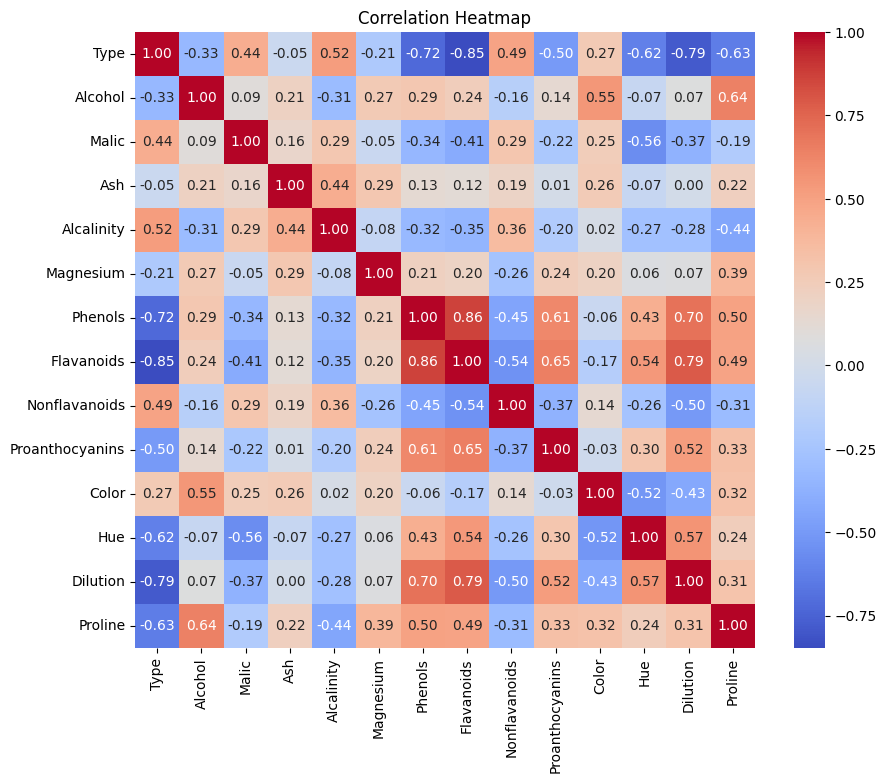

In [7]:

plt.figure(figsize=(10,8))
sns.heatmap(df_raw.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig("outputs/eda_plots/correlation_heatmap.png")
plt.show()
plt.close()


## Data Preprocessing

In [8]:

numeric_df = df_raw.select_dtypes(include=["int64","float64"])

if numeric_df.isnull().sum().sum() > 0:
    numeric_df = numeric_df.fillna(numeric_df.mean())

scaler = StandardScaler()
scaled_array = scaler.fit_transform(numeric_df)

df_scaled = pd.DataFrame(scaled_array, columns=numeric_df.columns)
df_scaled.to_csv("data/processed/scaled_wine.csv", index=False)

df_scaled.head()


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


## Principal Component Analysis (PCA)

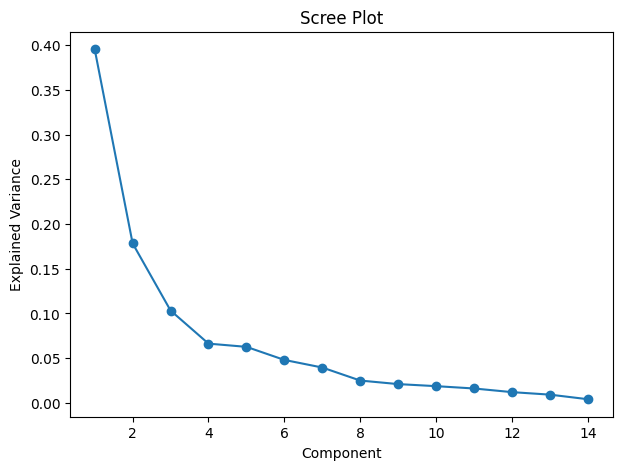

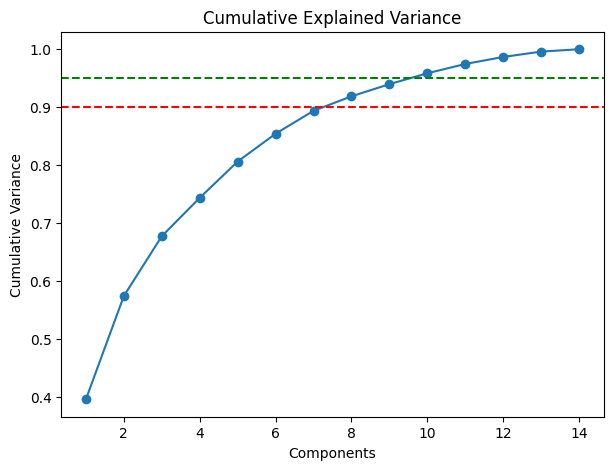

In [9]:

pca = PCA()
pca.fit(df_scaled)

explained = pca.explained_variance_ratio_
cumulative = np.cumsum(explained)

plt.figure(figsize=(7,5))
plt.plot(range(1, len(explained)+1), explained, marker="o")
plt.title("Scree Plot")
plt.xlabel("Component")
plt.ylabel("Explained Variance")
plt.savefig("outputs/pca_plots/scree_plot.png")
plt.show()
plt.close()

plt.figure(figsize=(7,5))
plt.plot(range(1, len(cumulative)+1), cumulative, marker="o")
plt.axhline(0.9, linestyle="--", color="r")
plt.axhline(0.95, linestyle="--", color="g")
plt.title("Cumulative Explained Variance")
plt.xlabel("Components")
plt.ylabel("Cumulative Variance")
plt.savefig("outputs/pca_plots/cumulative_variance.png")
plt.show()
plt.close()


In [10]:

pca_data = pca.transform(df_scaled)
pca_cols = [f"PC{i}" for i in range(1, pca_data.shape[1]+1)]
df_pca = pd.DataFrame(pca_data, columns=pca_cols)

df_pca.to_csv("data/processed/pca_transformed.csv", index=False)
df_pca.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,-3.522934,1.453098,-0.164795,-0.013273,0.737345,0.300716,0.573876,-0.055637,-0.458765,-1.065570,-0.420494,0.552928,-0.302978,0.200857
1,-2.528858,-0.330019,-2.026707,-0.417144,-0.283214,0.884309,-0.029716,-1.010372,0.218806,0.020182,-0.130020,0.394971,-0.146645,0.126402
2,-2.785029,1.036936,0.983238,0.664232,-0.387565,-0.468842,0.488305,0.268957,1.222769,0.106249,-0.279074,0.001898,0.021278,-0.055752
3,-3.922588,2.768210,-0.174968,0.565088,-0.324360,-0.262616,-0.398364,-0.618844,-0.114658,-0.107671,0.773866,-0.230929,-0.501277,0.019903
4,-1.407511,0.867773,2.025829,-0.440906,0.227949,0.593762,0.447876,-0.434937,-0.261548,-0.112434,-0.537931,-0.226686,0.274109,-0.517498


## K-Means Clustering on Original Data

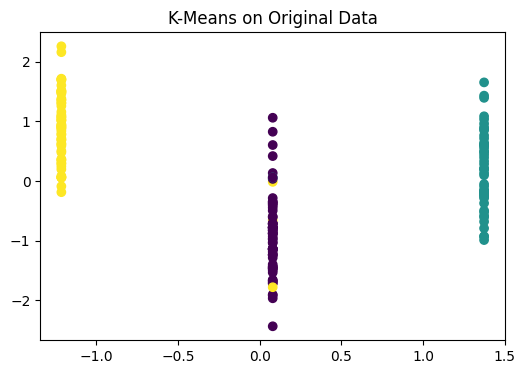

{'silhouette_score': 0.30648398324833453,
 'davies_bouldin_index': 1.315707552261773,
 'n_clusters': 3}

In [11]:

kmeans_orig = KMeans(n_clusters=3, random_state=42)
labels_orig = kmeans_orig.fit_predict(df_scaled)

sil_orig = silhouette_score(df_scaled, labels_orig)
db_orig = davies_bouldin_score(df_scaled, labels_orig)

plt.figure(figsize=(6,4))
plt.scatter(df_scaled.iloc[:,0], df_scaled.iloc[:,1], c=labels_orig, cmap="viridis")
plt.title("K-Means on Original Data")
plt.savefig("outputs/clustering_plots/original_kmeans.png")
plt.show()
plt.close()

orig_scores = {
    "silhouette_score": float(sil_orig),
    "davies_bouldin_index": float(db_orig),
    "n_clusters": 3
}

with open("outputs/reports/clustering_original_scores.json","w") as f:
    json.dump(orig_scores, f, indent=4)

orig_scores


## K-Means Clustering on PCA Data

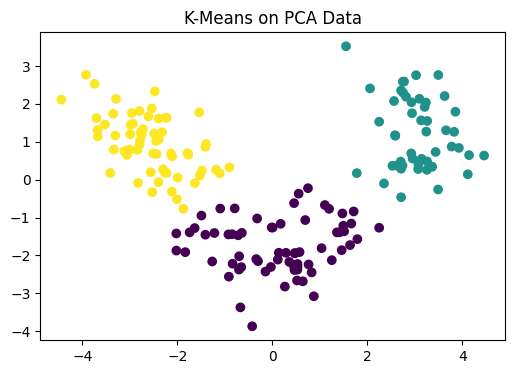

{'silhouette_score': 0.30648398324833453,
 'davies_bouldin_index': 1.315707552261773,
 'n_clusters': 3}

In [12]:

kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(df_pca)

sil_pca = silhouette_score(df_pca, labels_pca)
db_pca = davies_bouldin_score(df_pca, labels_pca)

plt.figure(figsize=(6,4))
plt.scatter(df_pca["PC1"], df_pca["PC2"], c=labels_pca, cmap="viridis")
plt.title("K-Means on PCA Data")
plt.savefig("outputs/clustering_plots/pca_kmeans.png")
plt.show()
plt.close()

pca_scores = {
    "silhouette_score": float(sil_pca),
    "davies_bouldin_index": float(db_pca),
    "n_clusters": 3
}

with open("outputs/reports/clustering_pca_scores.json","w") as f:
    json.dump(pca_scores, f, indent=4)

pca_scores


## Clustering Comparison

In [13]:

report_lines = []
report_lines.append("Clustering Comparison Report\n")
report_lines.append(f"Silhouette Score - Original Data: {sil_orig:.4f}")
report_lines.append(f"Silhouette Score - PCA Data: {sil_pca:.4f}\n")
report_lines.append(f"Davies-Bouldin Index - Original Data: {db_orig:.4f}")
report_lines.append(f"Davies-Bouldin Index - PCA Data: {db_pca:.4f}")

report_text = "\n".join(report_lines)

with open("outputs/reports/comparison_report.md", "w", encoding="utf-8") as f:
    f.write(report_text)

print(report_text)


Clustering Comparison Report

Silhouette Score - Original Data: 0.3065
Silhouette Score - PCA Data: 0.3065

Davies-Bouldin Index - Original Data: 1.3157
Davies-Bouldin Index - PCA Data: 1.3157


## Generate Requirements File

In [14]:

requirements = '''numpy
pandas
matplotlib
seaborn
scikit-learn
'''

with open("requirements.txt", "w") as f:
    f.write(requirements)

print("requirements.txt created.")


requirements.txt created.
